## Необходимые для работы библиотеки и модули

In [497]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Функция для отображение на графике области принятия решения

In [498]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=1.0):
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    x_x = np.linspace(x_min, x_max, 100)
    y_y = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(x_x, y_y)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        dec_val = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [dec_val.min(), 0,
        dec_val.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
        levels=fill_levels, colors=['cyan', 'red', 'yellow'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

## Загрузка данных

In [499]:
X, y = make_blobs(centers=2, random_state=28, cluster_std=4.5)

In [500]:
print("Координаты точек: X0|X1\n", X[:15])
print("Метки класса: ", y[:15])

Координаты точек: X0|X1
 [[ -2.52467218   5.509991  ]
 [-13.4336193   -1.69809935]
 [ -3.42914564   0.20484467]
 [  1.86920736   3.3012942 ]
 [-11.68128476  -6.35740982]
 [-11.21403158   4.70320389]
 [  4.26436057   9.22904112]
 [ -4.7448784   -0.15398861]
 [  2.05099142  -1.90331879]
 [  4.38832243   1.43395274]
 [  1.431567     1.4632393 ]
 [  2.67789298   0.9976655 ]
 [-11.3693878   -4.65613344]
 [  5.63456107   6.80209141]
 [  4.42550879  -2.60609209]]
Метки класса:  [0 1 1 0 1 1 0 1 0 0 0 0 1 0 0]


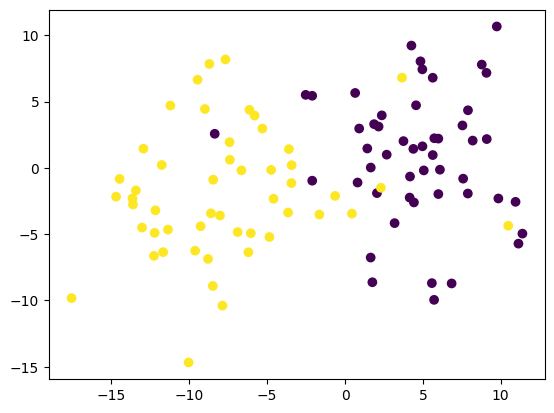

In [501]:
plt.scatter(X[:,0], X[:,1], c=y)

In [502]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.35, random_state=1)

### Обучающая выборка

[[-13.03650764  -4.5008509 ]
 [ -3.60428614   1.41556808]
 [ -4.85366611  -5.21535624]
 [  5.05969137  -0.19080411]
 [-13.61993187  -2.76232339]
 [  7.54212123   3.2024615 ]
 [  6.84699604  -8.71879913]
 [ -7.41584635   1.94052091]
 [ -2.10595249  -0.96606742]
 [  5.72106023  -9.95637589]]


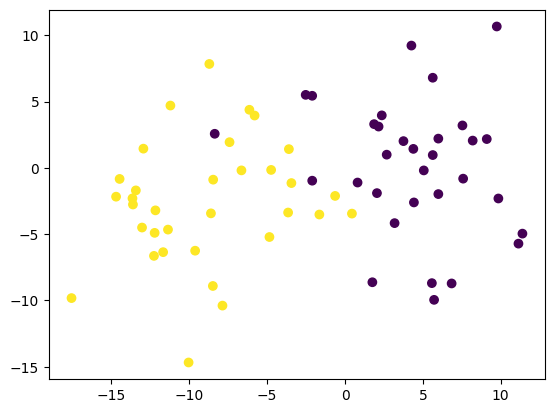

In [503]:
print(train_X[:10])
plt.scatter(train_X[:,0], train_X[:,1], c=train_Y)

### Тестовая выборка

[[-4.58837479 -2.32932475]
 [-7.67781987  8.1792985 ]
 [10.95191675 -2.56247613]
 [-9.46895206  6.65409159]
 [10.48405371 -4.3622068 ]
 [-7.39430893  0.6133558 ]
 [ 6.09619184 -0.13586711]
 [ 4.15148638 -2.2396504 ]
 [ 4.97311141  1.62754802]
 [ 1.64888544 -6.76481914]]


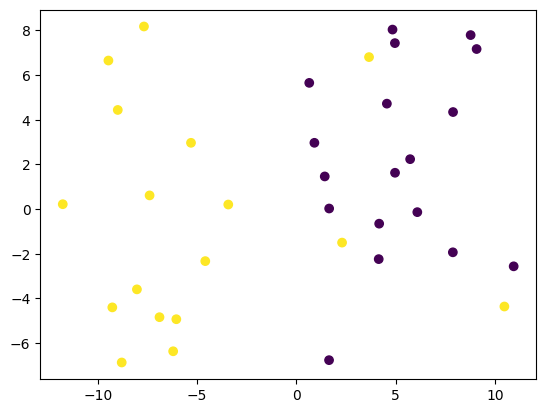

In [504]:
print(test_X[:10])
plt.scatter(test_X[:,0], test_X[:,1], c=test_Y)

## Обучение модели и классификация

In [505]:
def print_classification_metrics(classifier, X, y, prediction, test_Y):
    print("Значения предсказаные правдивые тестовые")
    print(prediction)
    print("Значения правдивые тестовые")
    print(test_Y)
    
    print("Матрица классификации")
    print(confusion_matrix(test_Y, prediction))
    print("Полученная точность классификации: ", accuracy_score(prediction, test_Y))
    print("Значения полноты, точности, f1-меры и аккуратности")
    print(classification_report(test_Y, prediction))
    print("Значение ошибок (AUC ROC)")
    print(roc_auc_score(test_Y, prediction))
    print("Область принятия решений")
    plt.xlabel("first")
    plt.ylabel("second")
    plot_2d_separator(classifier, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
    plt.show()

### Метод k-ближайших соседей n_neighbors = 1

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 4 13]]
Полученная точность классификации:  0.8857142857142857
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.76      0.87        17

    accuracy                           0.89        35
   macro avg       0.91      0.88      0.88        35
weighted avg       0.91      0.89      0.88        35

Значение ошибок (AUC ROC)
0.8823529411764706
Область принятия решений


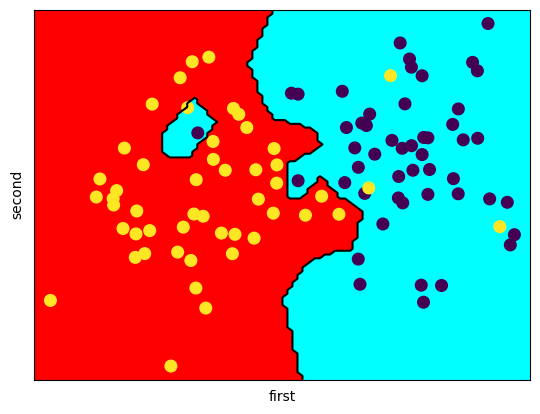

In [506]:
сlassifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
сlassifier.fit(train_X, train_Y)
prediction = сlassifier.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)

### Метод k-ближайших соседей n_neighbors = 3

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


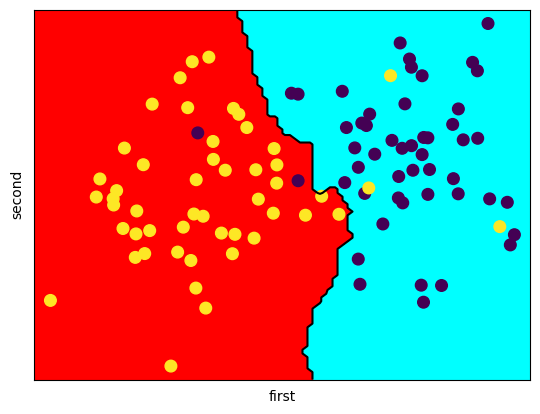

In [507]:
сlassifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
сlassifier.fit(train_X, train_Y)
prediction = сlassifier.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)

### Метод k-ближайших соседей n_neighbors = 5

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


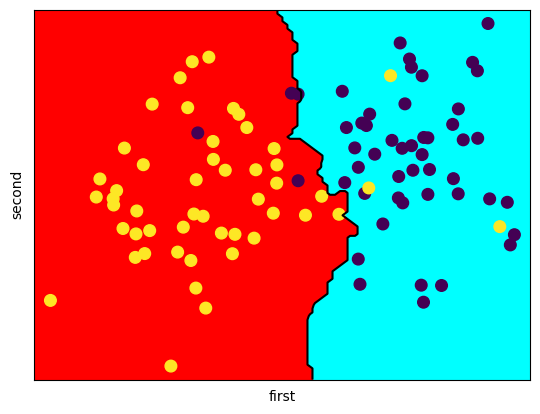

In [508]:
сlassifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
сlassifier.fit(train_X, train_Y)
prediction = сlassifier.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)

### Метод k-ближайших соседей n_neighbors = 9

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


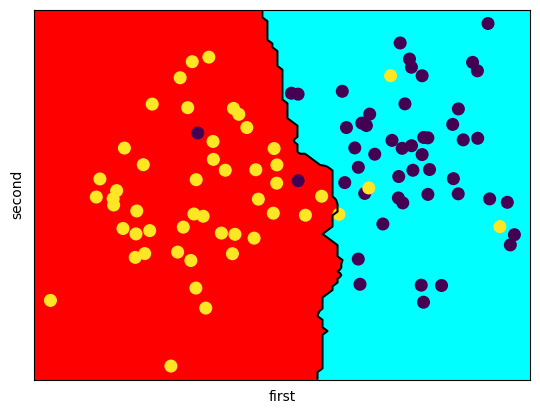

In [509]:
сlassifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
сlassifier.fit(train_X, train_Y)
prediction = сlassifier.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)

### Наивный байесовский метод

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


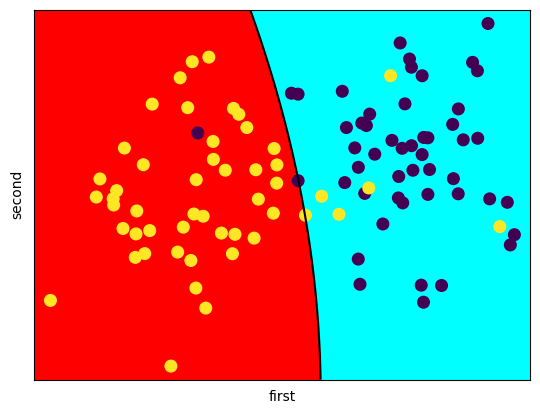

In [510]:
naive = GaussianNB()
naive.fit(train_X, train_Y)
predict = naive.predict(test_X)
print_classification_metrics(naive, X, y, predict, test_Y)

### Случайный лес n_estimators 5

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


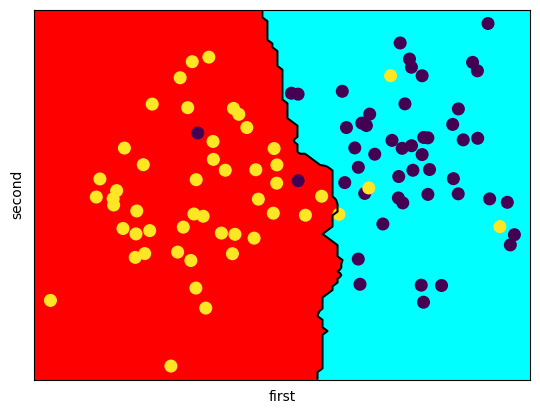

In [511]:
rand_forest = RandomForestClassifier(n_estimators=5)
rand_forest.fit(train_X, train_Y)
prediction = rand_forest.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)

### Случайный лес n_estimators 10

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


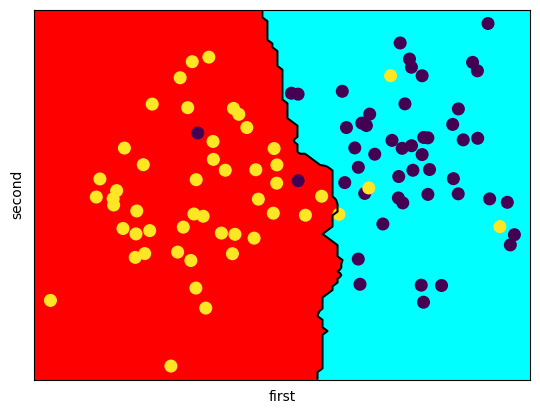

In [512]:
rand_forest = RandomForestClassifier(n_estimators=10)
rand_forest.fit(train_X, train_Y)
prediction = rand_forest.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)

### Случайный лес n_estimators 15

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


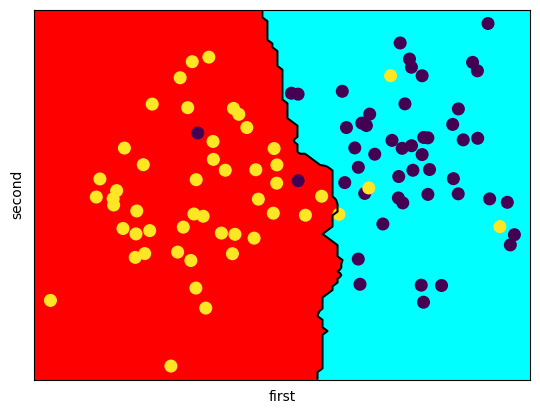

In [513]:
rand_forest = RandomForestClassifier(n_estimators=15)
rand_forest.fit(train_X, train_Y)
prediction = rand_forest.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)

### Случайный лес n_estimators 20

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


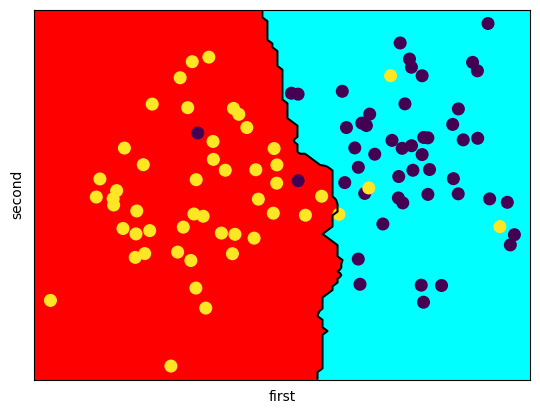

In [514]:
rand_forest = RandomForestClassifier(n_estimators=20)
rand_forest.fit(train_X, train_Y)
prediction = rand_forest.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)

### Случайный лес n_estimators 50

Значения предсказаные правдивые тестовые
[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0]
Значения правдивые тестовые
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0]
Матрица классификации
[[18  0]
 [ 3 14]]
Полученная точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.82      0.90        17

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.91        35
weighted avg       0.93      0.91      0.91        35

Значение ошибок (AUC ROC)
0.9117647058823529
Область принятия решений


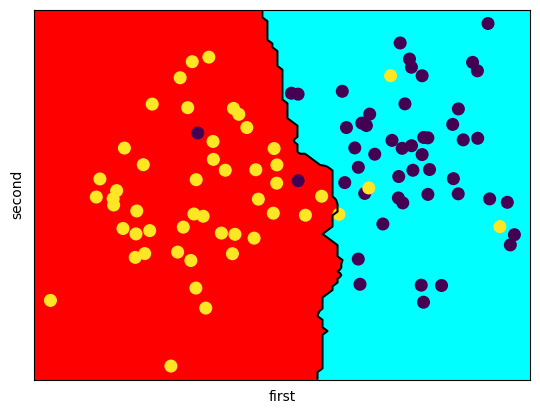

In [515]:
rand_forest = RandomForestClassifier(n_estimators=50)
rand_forest.fit(train_X, train_Y)
prediction = rand_forest.predict(test_X)
print_classification_metrics(сlassifier, X, y, prediction, test_Y)